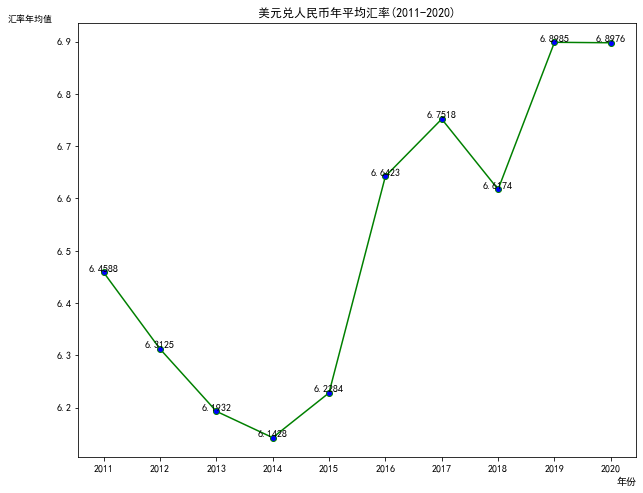

In [1]:
import requests
import json
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.rcParams['font.sans-serif']=['SimHei']      
plt.rcParams['axes.unicode_minus'] = False  


baseUrl = "http://www.chinamoney.com.cn/ags/ms/cm-u-bk-ccpr/CcprYearAvgHisNew?pageNum=1&pageSize=1000" 
t = time.time()
timestamp = int(round(t * 1000))
url = baseUrl + "&t=" + str(timestamp)

res = requests.get(url)
data = json.loads(res.text)
startYear = data['data']['startYear']
endYear = data['data']['endYear']
records = data['records'][::-1]

x = []
y = []
for record in records:
    x.append(int(record['date']))
    y.append(float(record['values'][0]))


fig=plt.figure(figsize=(10,8))
plt.plot(x,y,color='g',markerfacecolor='blue',marker='o')

x_major_locator=MultipleLocator(1.00)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

for a, b in zip(x, y):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)  

plt.title("美元兑人民币年平均汇率(%s-%s)" % (startYear, endYear))
plt.xlabel("年份", loc = "right")
plt.ylabel("汇率年均值", loc = "top", rotation = 0, fontsize = 9)

plt.show()